In [ ]:
from google.colab import drive
import glob
import itertools
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras import layers, metrics

In [ ]:
mount = '/content/gdrive'

drive.mount(mount)

drive_root = mount + '/My Drive'

%cd $drive_root

Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
no_of_samples = 600
images = []
labels = []
length = 128
width = 128
size = length, width

labels_map = {
    'a': 0,
    'b': 1,
    'c': 2,
    'd': 3,
    'e': 4,
    'f': 5,
    }

In [ ]:
for label in labels_map:
  
  temp = 0
  
  for path in glob.glob('Dataset/ASL/' + label + '/*.jpg'):
    if temp < no_of_samples:
      img = cv2.imread(path)
      
      grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      inp = cv2.resize(grayscale, size)

      images.append(inp)
      labels.append(labels_map[label])
      temp = temp + 1
  
  print(label)

a
b
c
d
e
f


(-0.5, 127.5, 127.5, -0.5)

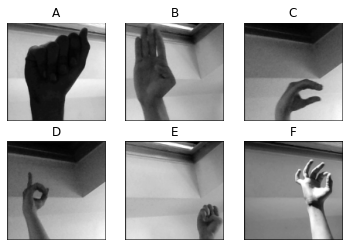

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.imshow(images[no_of_samples * 0 + 1], cmap='gray')
ax1.set(title='A')
ax1.axis('off')
ax2.imshow(images[no_of_samples * 1 + 1], cmap='gray')
ax2.set(title='B')
ax2.axis('off')
ax3.imshow(images[no_of_samples * 2 + 1], cmap='gray')
ax3.set(title='C')
ax3.axis('off')
ax4.imshow(images[no_of_samples * 3 + 1], cmap='gray')
ax4.set(title='D')
ax4.axis('off')
ax5.imshow(images[no_of_samples * 4 + 1], cmap='gray')
ax5.set(title='E')
ax5.axis('off')
ax6.imshow(images[no_of_samples * 5 + 1], cmap='gray')
ax6.set(title='F')
ax6.axis('off')

In [ ]:
images = np.asarray(images, dtype=np.float32)
images = images/255.0
labels = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

binarizer = LabelBinarizer()
Y_train = binarizer.fit_transform(Y_train)
Y_test = binarizer.fit_transform(Y_test)

In [ ]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='valid', input_shape=(length,width,1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
    
model.add(layers.Conv2D(32, 3, 3, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
  
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

no_of_epochs = 30
history = model.fit(
    x=X_train, 
    y=Y_train,
    epochs=no_of_epochs,
    validation_data = (X_test, Y_test)
)

Epoch 1/30
79/79 [==============================] - 31s 386ms/step - loss: 1.7884 - accuracy: 0.2040 - val_loss: 1.7461 - val_accuracy: 0.2380
Epoch 2/30
79/79 [==============================] - 31s 392ms/step - loss: 1.5686 - accuracy: 0.3468 - val_loss: 1.3007 - val_accuracy: 0.5130
Epoch 3/30
79/79 [==============================] - 31s 387ms/step - loss: 1.1718 - accuracy: 0.5321 - val_loss: 0.9374 - val_accuracy: 0.6315
Epoch 4/30
79/79 [==============================] - 31s 392ms/step - loss: 0.8286 - accuracy: 0.6778 - val_loss: 0.6892 - val_accuracy: 0.7583
Epoch 5/30
79/79 [==============================] - 30s 384ms/step - loss: 0.6311 - accuracy: 0.7599 - val_loss: 0.5418 - val_accuracy: 0.8167
Epoch 6/30
79/79 [==============================] - 30s 386ms/step - loss: 0.4927 - accuracy: 0.8159 - val_loss: 0.5065 - val_accuracy: 0.8074
Epoch 7/30
79/79 [==============================] - 31s 391ms/step - loss: 0.3882 - accuracy: 0.8579 - val_loss: 0.4083 - val_accuracy: 0.8426

In [ ]:
Y_test.size

6480

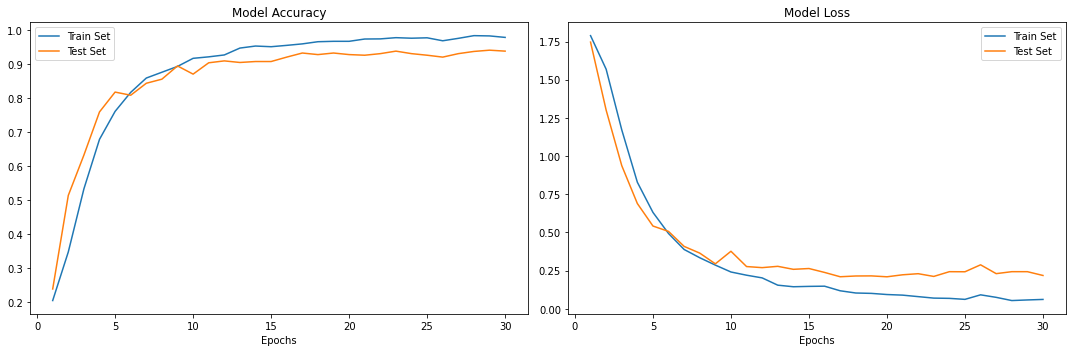

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, no_of_epochs + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(np.argmax(Y_test, axis=1),
                      np.argmax(y_pred, axis=1),
                      target_names=['a', 'b', 'c', 'd', 'e', 'f']))

              precision    recall  f1-score   support

           a       0.90      0.91      0.91       211
           b       0.93      0.95      0.94       182
           c       1.00      0.99      1.00       174
           d       0.94      0.95      0.95       166
           e       0.89      0.86      0.87       172
           f       0.97      0.97      0.97       175

    accuracy                           0.94      1080
   macro avg       0.94      0.94      0.94      1080
weighted avg       0.94      0.94      0.94      1080



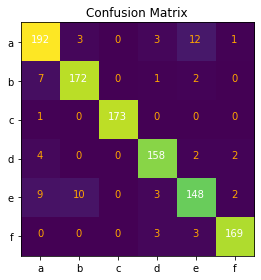

In [ ]:
conmat = confusion_matrix(np.argmax(Y_test, axis=1),
                      np.argmax(y_pred, axis=1))
plt.imshow(conmat, interpolation='nearest')
plt.title('Confusion Matrix')
ticks = np.arange(6)
plt.xticks(ticks=ticks, labels=['a', 'b', 'c', 'd', 'e', 'f'])
plt.yticks(ticks=ticks, labels=['a', 'b', 'c', 'd', 'e', 'f'])

thresh = conmat.max() / 2
for i, j in itertools.product(range(conmat.shape[0]), range(conmat.shape[1])):
    plt.text(j, i, conmat[i, j],
    horizontalalignment="center",
    color="white" if conmat[i, j] > thresh else "orange")
    
plt.tight_layout()

plt.show()